<a href="https://colab.research.google.com/github/KIVILCIIM/Data-Science/blob/main/Python_ile_Makine_%C3%96%C4%9Frenmesi_Polinomsal_Regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Kütüphaneyi içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn kütüphanesini içe aktar
from sklearn.linear_model import LinearRegression #doğrusal
from sklearn.preprocessing import PolynomialFeatures #polinomsal

In [3]:
df = pd.read_csv("/content/drive/MyDrive/BTK/DATASET/polinomsal_regresyon_veriseti_20220209.csv", sep= ";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [7]:
# sklearn input olarak genellikle numpy kabul eder
y = df.araba_max_hiz.values.reshape(-1,1) #numpy array'e çevir
x = df.araba_fiyat.values.reshape(-1,1)   #numpy array'e çevir

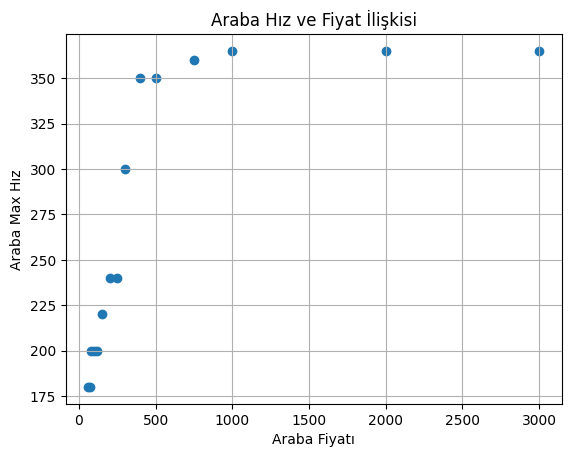

In [8]:
# veriyi görselleştir
plt.scatter(x,y)
plt.ylabel("Araba Max Hız")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

Veri setinde hız ve fiyat arasında doğrusalbir ilişki bulunmadığını gözlemleyebiliyoruz.

Belli bir hızdan sonra fiyat artışı gözlemlense de maximum hız sabit kalmaktadır



In [10]:
# Sadece gözlemlemek amacıyla linear regresyonu deneyelim

# Doğrusal Regresyon Modeli Eğitimi
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

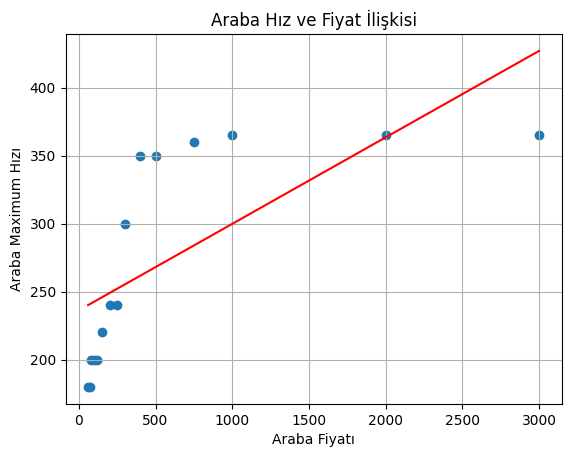

10 milyon TL'lik araba hızı tahmini:  [[871.66401826]]


In [13]:
#%% tahmin
y_tahmin = lr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_tahmin, color="red")
plt.ylabel("Araba Maximum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

araba_fiyatı = 10000
print("10 milyon TL'lik araba hızı tahmini: ", lr.predict((np.array([araba_fiyatı]).reshape(-1,1))))

Bu veri seti için doğrusal regresyon uygun değildir

In [24]:
# polinomsal regresyon  = y= b0 + b1*x + b2*x^2 + b3*x^3 + ... + bn*x^n

# polinomsal özellikler
polinom_regresyon = PolynomialFeatures(degree=4) # 4. dereceden polinom

x_polinom = polinom_regresyon.fit_transform(x)
x_polinom
# çıktılar sırasıyla  b0 + b1*x + b2*x^2 + b3*x^3 + ... + bn*x^n -> n = 4 için

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [25]:
# %% polinomsal regresyon eğitebilmek için polinomsal özellikler ile karşılaştırma
lr2 = LinearRegression()
lr2.fit(x_polinom,y)

LinearRegression()

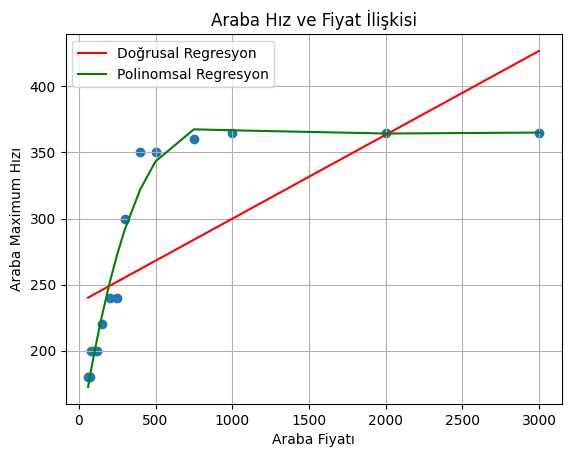

In [26]:
# tahmin
y_tahmin2 = lr2.predict(x_polinom)

plt.scatter(x,y)
plt.plot(x,y_tahmin, color="red", label="Doğrusal Regresyon")
plt.plot(x,y_tahmin2, color="green", label="Polinomsal Regresyon")
plt.legend()
plt.ylabel("Araba Maximum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

In [27]:
# degree yüksek seçilmesi over-fitting prblemine yol açabilirdi
polinom_regresyon_10 = PolynomialFeatures(degree=10) # 10. dereceden polinom

x_polinom_10 = polinom_regresyon.fit_transform(x)
x_polinom_10

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [28]:
lr10 = LinearRegression()
lr10.fit(x_polinom_10,y)

LinearRegression()

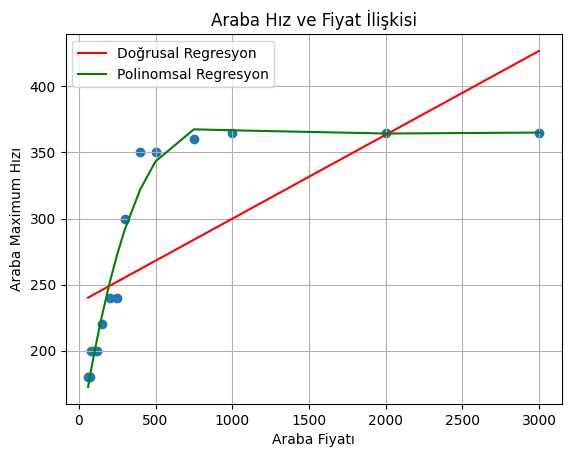

In [29]:
# tahmin
y_tahmin10 = lr10.predict(x_polinom_10)

plt.scatter(x,y)
plt.plot(x,y_tahmin, color="red", label="Doğrusal Regresyon")
plt.plot(x,y_tahmin10, color="green", label="Polinomsal Regresyon")
plt.legend()
plt.ylabel("Araba Maximum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()